# Digitale lineare Modulationsverfahren

## Signalräume (Aphabete)

Lineare digitale Modulationsverfahren bilden $m$-Bit-Tupel auf diskrete Symbole $D_i$ eines entsprechenden Signalraumalphabets $\mathbb D$ der Kardinalität $M=2^m$ ab. Dabei unterscheidet man wie im analogen Fall zwischen Amplituden-, Phasen- und Frequenzmodulation. Da nur diskrete Werte der drei Größen vorkommen können, spricht man auch von Amplituden-, Phasen- und Frequenzumtastung. Gebräulicher sind die englischen Bezeichnungen
* ASK: Amplitude Shift Keying 
* QAM: Quadrature Amplitude Modulation 
* PSK: Phase Shift Keying
* FSK: Frequency Shift Keying .

Während die Frequenzmodulation zur Klasse der nichtlinearen Modulationsverfahren zählt und hier nicht weiter betrachet wird, gehören ASK, QAM und PSK zu den linearen Verfahren. Ihre Signalräume werden im Folgenden dargestellt. Man erkennt für das Beispiel $M=16$, dass die ASK ein rein reelles Amplitudenmodulationsverfahren ist, bei dem die Symbole sehr dicht zueinander angeordnet sind. Die QAM nutzt hingegen die komplexe Ebene aus und kann bei gleicher Anzahl von Symbolen einen deutlich größeren Abstand zwischen Symbolnachbarn gewährleisten. Bei der PSK liegen die Symbole alle auf einem Kreis. Die Information wird hier in der Symbolphase übertragen, während der Betrag konstant bleibt.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from Mapping.modulation import Modulation

# cardinality of modulation scheme
M = 16
m = int(np.round(np.log2(M)))

# ASK alphabet
ask = Modulation(m,modulation_type='ASK')
# ASK alphabet normlized to unit average power
ask_alphabet = ask._MOD
ask_norm = ask._MOD_

# QAM alphabet
qam = Modulation(m,modulation_type='QAM')
# QAM alphabet normalized to unit average power
qam_alphabet = qam._MOD
qam_norm = qam._MOD_
sqrtM = np.sqrt(M)

# PSK alphabet
psk = Modulation(m,modulation_type='PSK')
psk_alphabet = psk._MOD
psk_norm = psk._MOD_

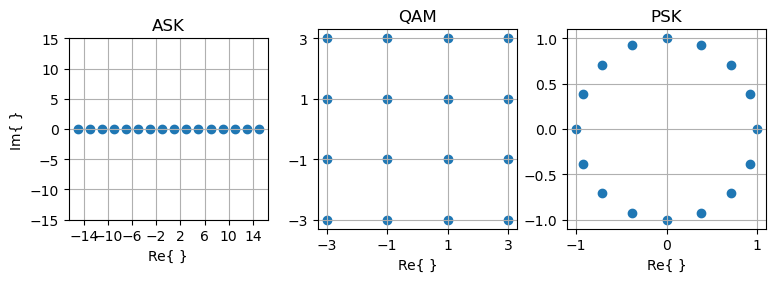

In [2]:
fig = plt.figure(figsize=(9,6))
plt.subplots_adjust(wspace=0.25)
ax = fig.add_subplot(131)
ax.scatter(np.real(ask_norm), np.imag(ask_norm), marker='o')
ax.set(adjustable='box', aspect='equal')
plt.xlabel('Re{ }')
plt.ylabel('Im{ }')
plt.title('ASK')
plt.grid(True)
plt.xlim((-M,M))
plt.ylim((-M,M))
plt.xticks(np.arange(2-M,M,M//4))

ax = fig.add_subplot(132)
ax.scatter(np.real(qam_norm), np.imag(qam_norm), marker='o')
ax.set(adjustable='box', aspect='equal')
plt.xlabel('Re{ }')
#plt.ylabel('Im{ }')
plt.title('QAM')
plt.grid(True)
plt.xticks(2*(np.arange(sqrtM)-sqrtM/2+1)-1)
plt.yticks(2*(np.arange(sqrtM)-sqrtM/2+1)-1)

ax = fig.add_subplot(133)
ax.scatter(np.real(psk_norm), np.imag(psk_norm), marker='o')
ax.set(adjustable='box', aspect='equal')
plt.xlabel('Re{ }')
#plt.ylabel('Im{ }')
plt.title('PSK')
plt.grid(True)


## Mapping

Um die Zuordnung der Bit-Tupel auf die Symbole genauer zu betrachten, zeigen die folgenden Graphiken die Signalräume mit den binären Darstellungen. Es ist zu erkennen, dass eine natürliche Dualzahlendarstellung gewählt wurde, so dass benachbarte Amplitudenwerte sich unter Umständen in allen 4 Bit unterscheiden. Dies führt zu einer hohen Bitfehlerwahrscheinlichkeit bei gestörter Übertragung.

In [3]:
# generate numbers from zero to M-1
u_dec = np.arange(M,dtype=int)
# generate corresponding bit pattern
u_bin = np.zeros((M,m),dtype=int)
for run in np.arange(M):
    u_bin[run,:] = int2bin(u_dec[run],m)

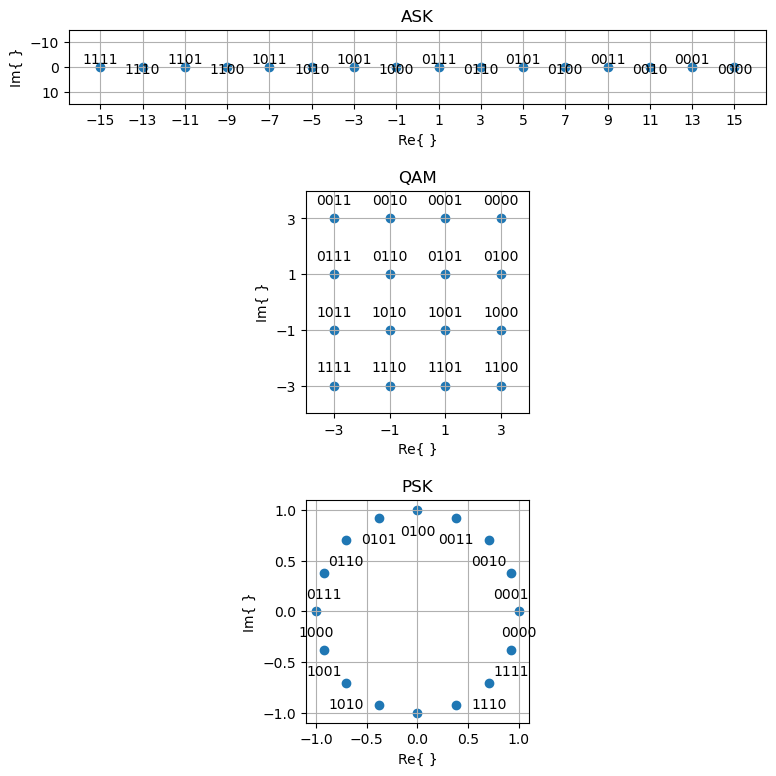

In [4]:
labels = np.empty(M,dtype=object)
for run1 in np.arange(M):
    labels[run1] = ''
    for run2 in np.arange(m): 
        labels[run1] = labels[run1] + str(u_bin[run1,run2])

fig = plt.figure(figsize=(9,9))
heights = [1, 2, 2]
spec = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[1, 3, 3])
      
plt.subplots_adjust(hspace=0.5)
ax = fig.add_subplot(spec[0])
ax.scatter(np.real(ask), np.imag(ask), marker='o')
plt.xlabel('Re{ }')
plt.ylabel('Im{ }')
plt.title('ASK')
plt.grid(True)
plt.ylim((ask[0],ask[-1]))
plt.xticks(ask)
# print Gray label at each symbol
for run in np.arange(M):
    plt.annotate(labels[run], (M-1-2*run,2*(-1)**run+0.5),ha='center')
    
ax = fig.add_subplot(spec[1])
ax.set(adjustable='box', aspect='equal')
ax.scatter(np.real(qam), np.imag(qam), marker='o')
plt.xlabel('Re{ }')
plt.ylabel('Im{ }')
plt.title('QAM')
plt.grid(True)
plt.xlim((-sqrtM,sqrtM))
plt.ylim((-sqrtM,sqrtM))
plt.xticks(sqrt_ask)
plt.yticks(sqrt_ask)
# print Gray label at each symbol
for run in np.arange(M):
    plt.annotate(labels[run], (np.real(qam[run]),np.imag(qam[run])+0.5),ha='center')
    
ax = fig.add_subplot(spec[2])
ax.set(adjustable='box', aspect='equal')
ax.scatter(np.real(psk), np.imag(psk), marker='o')
plt.xlabel('Re{ }')
plt.ylabel('Im{ }')
plt.title('PSK')
plt.grid(True)
# print Gray label at each symbol
for run in np.arange(M):
    plt.annotate(labels[run], (np.real(psk[run]),np.imag(psk[run])-0.25),ha='center')    

Aus diesem Grund wird in der Regel die Gray-Codierung verwendet, bei der sich Bitmuster benachbarter Amplitudenwerte nur in einem Bit unterscheiden. Dies minimiert die Bitfehlerwahrscheinlichkeit. 

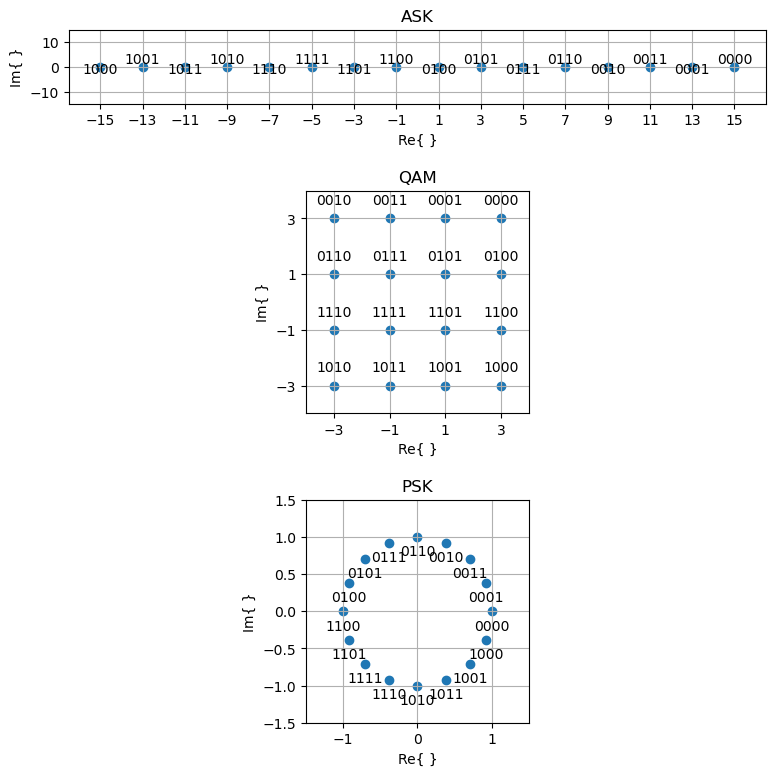

In [5]:
graylabels = np.empty(M,dtype=object)
for run1 in np.arange(M):
    u_gray = bin2gray(u_bin[run1,:].tolist())
    graylabels[run1] = ''
    for run2 in np.arange(m): 
        graylabels[run1] = graylabels[run1] + str(u_gray[run2])

# QAM: independent Gray mapping for real and imaginary parts
graylabelsASK = np.empty(sqrtM,dtype=object)
u_decASK = np.arange(sqrtM,dtype=int)
# generate corresponding bit pattern
for run1 in np.arange(sqrtM):
    u_binASK = int2bin(u_decASK[run1],int(m/2))
    u_grayASK = bin2gray(u_binASK.tolist())
    graylabelsASK[run1] = ''
    for run2 in np.arange(int(m/2)): 
        graylabelsASK[run1] = graylabelsASK[run1] + str(u_grayASK[run2])

# combine 2 ASK codewords to 1 QAM codeword
graylabelsQAM = np.empty(M,dtype=object)
for run1 in np.arange(sqrtM):
    for run2 in np.arange(sqrtM):
        graylabelsQAM[run1*sqrtM+run2] = graylabelsASK[run1]+graylabelsASK[run2]

fig = plt.figure(figsize=(9,9))
spec = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[1, 3, 3])

plt.subplots_adjust(hspace=0.5)
ax = fig.add_subplot(spec[0])
ax.scatter(np.real(ask), np.imag(ask), marker='o')
plt.xlabel('Re{ }')
plt.ylabel('Im{ }')
plt.title('ASK')
plt.grid(True)
plt.ylim((-15.0,15.0))
plt.xticks(ask)
# print label at each symbol
for run in np.arange(M):
    plt.annotate(graylabels[run], (M-1-2*run,2*(-1)**run-0.5),ha='center')
    
ax = fig.add_subplot(spec[1])
ax.set(adjustable='box', aspect='equal')
ax.scatter(np.real(qam), np.imag(qam), marker='o')
plt.xlabel('Re{ }')
plt.ylabel('Im{ }')
plt.title('QAM')
plt.grid(True)
plt.xlim((-sqrtM,sqrtM))
plt.ylim((-sqrtM,sqrtM))
plt.xticks(sqrt_ask)
plt.yticks(sqrt_ask)
# print label at each symbol
for run in np.arange(M):
    plt.annotate(graylabelsQAM[run], (np.real(qam[run]),np.imag(qam[run])+0.5),ha='center')
    
ax = fig.add_subplot(spec[2])
ax.set(adjustable='box', aspect='equal')
ax.scatter(np.real(psk), np.imag(psk), marker='o')
plt.xlabel('Re{ }')
plt.ylabel('Im{ }')
plt.title('PSK')
plt.grid(True)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
# print label at each symbol
for run in np.arange(M):
    plt.annotate(graylabels[run], (np.real(psk[run]),np.imag(psk[run])-0.25),ha='center')        